In [16]:
import zipfile



In [17]:
with zipfile.ZipFile('archive.zip', 'r') as zip_ref:
    zip_ref.extractall()

In [1]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

2024-01-12 00:56:00.798040: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-01-12 00:56:00.802623: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-01-12 00:56:00.860106: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-12 00:56:00.860144: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-12 00:56:00.862723: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to

In [2]:
# generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/home/cloud/jpnotebook/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/home/cloud/jpnotebook/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 5000 files belonging to 2 classes.
Found 20000 files belonging to 2 classes.


In [3]:
# Normalize
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [4]:
# create CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [14]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization_3 (Bat  (None, 254, 254, 32)      128       
 chNormalization)                                                
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_4 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                      

In [5]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
157/157 [==============================] - ETA: 0s - loss: 3.3533 - accuracy: 0.5646

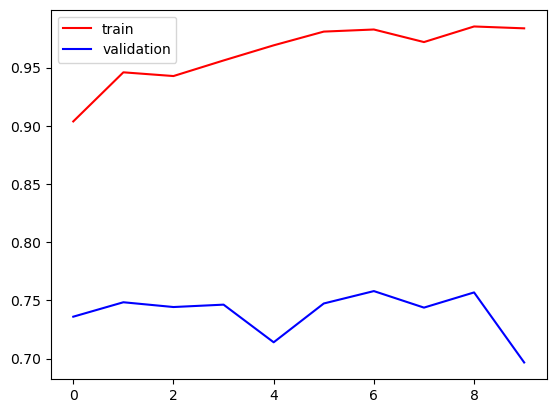

In [44]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

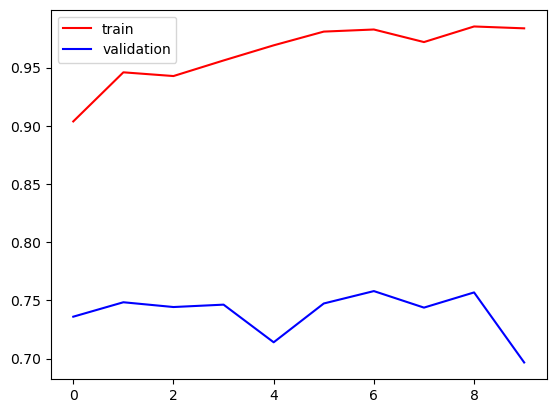

In [45]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

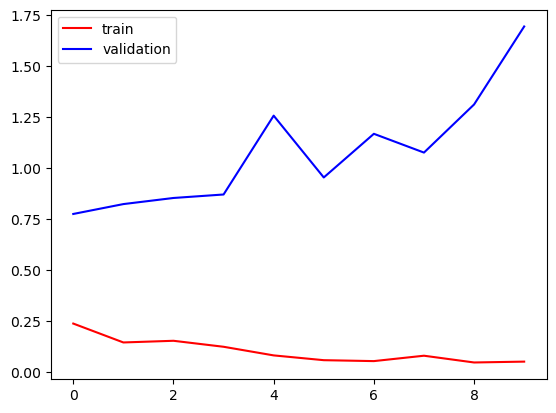

In [46]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

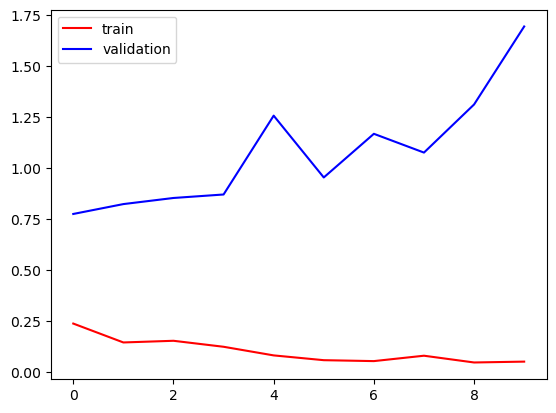

In [47]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [48]:
import cv2

In [49]:
test_img = cv2.imread('/home/cloud/jpnotebook/train/cats/cat.5.jpg')

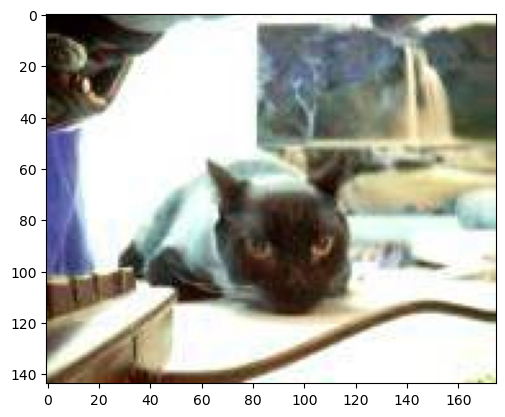

In [50]:
plt.imshow(test_img)

In [51]:
test_img.shape

(144, 175, 3)

In [52]:
test_img = cv2.resize(test_img,(256,256))

In [53]:
test_input = test_img.reshape((1,256,256,3))

In [54]:
model.predict(test_input)

1/1 [==============================] - 0s 36ms/step


array([[0.]], dtype=float32)

####

In [55]:
model.save('home/cloud/PycharmProjects/udhay/model.h5')

In [56]:
model=tf.keras.models.load_model("/home/cloud/PycharmProjects/udhay/model.h5")

In [220]:
test_img = cv2.imread('/home/cloud/jpnotebook/train/dogs/dog.23.jpg')


# here change the image to test, like : dog.7.jpg,  dog.8.jpg.....
# like that some of them are predicted correctly in dog class
#eg: dog.6 ,  8, 13,  15, 16, 20, 21, ....like wise
# while you executing and show to them... put these dog images in website
#so that it classify correctly the dog class.
# aprama, we can improve the model. okay va
# bye.... varataaaaaa.....





In [221]:
test_img = cv2.resize(test_img,(256,256))

In [222]:
test_input = test_img.reshape((1,256,256,3))

In [223]:
model.predict(test_input)

1/1 [==============================] - 0s 43ms/step


array([[0.]], dtype=float32)

In [151]:
# dont run this ,here after rough
import numpy as np

In [115]:
pred = model.predict(test_input)
type(pred)
print(int(pred[0][0]))
#p=np.argmax(pred,axis=-1)
#print(p)

1/1 [==============================] - 0s 35ms/step
1


In [116]:
#rough work